In [1]:
import numpy as np
from DG_classes import *
from DiffusionGeometry import *
import matplotlib.pyplot as plt
from DG_ml_stats import *
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from visualisation import *

In [2]:
parameters = {}
parameters['n0'] = 50
parameters['n1'] = 20
parameters['n2'] = 6
parameters['ep'] = 0.13
parameters['alpha'] = 1
parameters['projection_tol'] = 1e-2
n0,n1,n2 = parameters['n0'],parameters['n1'],parameters['n2']
parameters

{'n0': 50, 'n1': 20, 'n2': 6, 'ep': 0.13, 'alpha': 1, 'projection_tol': 0.01}

In [3]:
n = 100
xx = np.linspace(0, 2*np.pi, n)
data = np.array([[np.cos(x), np.sin(x)] for x in xx]) + 0.2*np.random.randn(xx.shape[0], 2)
data = 1*np.array([[np.cos(x)/(1 + np.sin(x)**2), np.sin(x)*np.cos(x)/(1 + np.sin(x)**2)] for x in xx]) + 0.06*np.random.randn(xx.shape[0], 2) + 0.1*data

data = np.concatenate((data, 0.2*np.random.randn(n,2) - [0.6,0]))

parameters['n0'] = 45
X = DG(data, parameters)

px.scatter(x = X.data[:,0], y = X.data[:,1], color = X.u()[3])
# # test.weak_eigenproblem_1(test.D1())

# X.lam().round(3)

In [4]:
v = np.zeros([n1,n2,n2])
v[0,4,5] = X.u()[0,0]
# v[0,5,4] = 0.3
v = v.flatten()

plot_2_form_plain(v, X)
print(v.T @ X.G2() @ v)

0.27367657203725837


In [5]:
g = X.u().T @ contract('ijk,i,j',X.g2(),v,v)

px.scatter(x = X.data[:,0], y = X.data[:,1], color = g)

In [6]:
v1 = np.zeros([n1,n2])
v2 = np.zeros([n1,n2])
v1[1,4] = 1
v2[0,5] = 1
v1 = v1.flatten()
v2 = v2.flatten()
plot_quiver_plain(0.2*v1, X)

L1, U1 = X.weak_eigenproblem_1(X.D1())
v1 = U1[:,0]

In [7]:
# plot_2_form_plain(contract('ijk,i,j', X.wedge_11(), v1, v2), X)
plot_2_form_plain(0.01*X.d1() @ v1, X)


In [8]:
plot_quiver_plain(0.2*v2, X)

In [9]:

plot_2_form_plain(v, X)

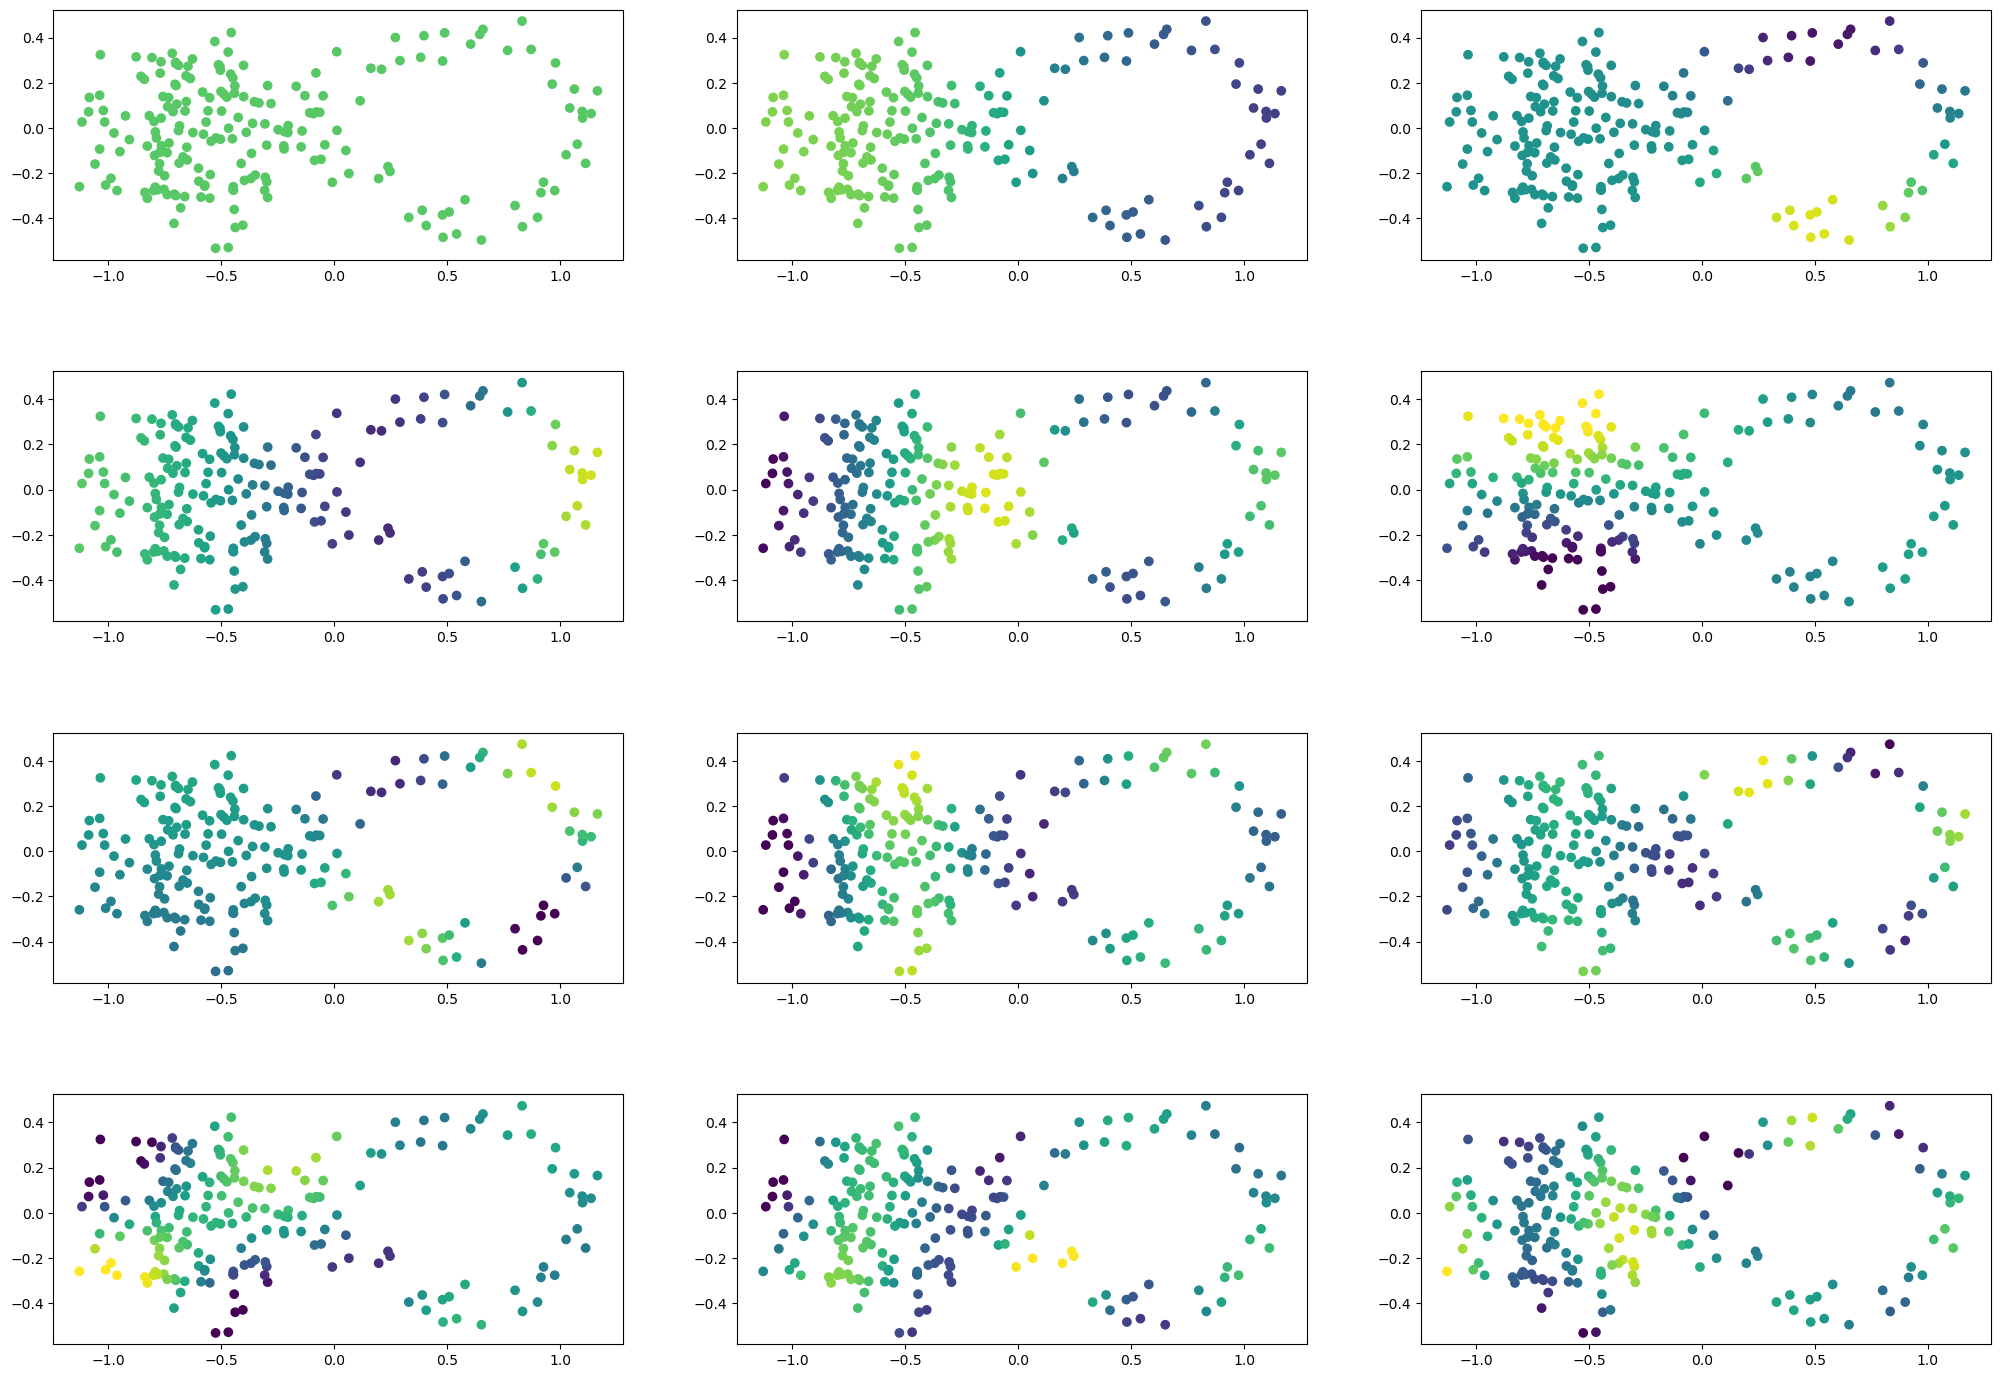

In [10]:
X.plot_eigenfunctions(4,3)

In [11]:
ball = np.random.randn(200,3)
ball /= np.linalg.norm(ball, axis = 1).reshape(-1,1)

x = np.linspace(0,2*np.pi,60)
circle = np.stack([np.cos(x),np.sin(x),np.zeros(60)],axis=1)

data = np.concatenate([ball,
                       circle + [2,0,0],
                       circle - [2,0,0]], axis=0)

data += 0.05 * np.random.randn(data.shape[0],3)

plot_3d(data)
parameters['ep'] = 0.1
parameters['n1'] = 20
parameters['n2'] = 6
test = DG(data, parameters)
# plt.scatter(test.data[:,0], test.data[:,2], c = test.u()[3])
# test.weak_eigenproblem_1(test.D1())

print(test.lam().round(3))

# vmin = 0.004
# vmax = 0.007

# fig = go.Figure(data=[go.Scatter3d(x = data[:,0],
#                                     y = data[:,1],
#                                     z = data[:,2],
#                                     mode='markers',
#                                     marker=dict(
#                                             size=10,
#                                             color=test.u()[6],                # set color to an array/list of desired values
#                                             # colorscale='PRGn',   # choose a colorscale
#                                             opacity=1
#                                         ))])
# fig.update_traces(marker_size = 3)
# fig.update_layout(scene_aspectmode='data')
# fig.show()

[-0.     0.16   0.267  0.595  0.782  0.869  0.959  1.     1.503  1.729
  1.991  2.355  2.43   2.72   3.087  3.453  3.507  3.748  3.81   4.103
  4.705  5.01   5.352  5.687  5.845  6.311  6.596  6.94   7.107  7.737
  8.186  8.429  8.642  8.756  8.892  9.054 10.188 10.937 11.606 11.883
 12.575 12.798 13.012 13.379 13.727]


In [12]:
L1, U1 = test.weak_eigenproblem_1(test.D1())
print(L1.round(2)[:20])

grad = test.d0() @ test.grad_decomp_matrix() @ U1
print((grad.T @ test.G1() @ grad).diagonal().round(2)[:20])

[0.05 0.07 0.29 0.34 0.52 0.57 0.65 0.73 0.81 0.91 1.08 1.18 1.19 1.37
 1.51 1.67 1.74 1.78 2.02 2.12]
[0.   0.01 0.89 0.96 0.1  0.18 0.8  0.27 0.94 0.98 0.06 0.37 0.69 0.48
 0.29 0.61 0.48 0.35 0.18 0.57]


In [13]:
fig = go.Figure(data=[go.Scatter3d(x = data[:,0],
                                    y = data[:,1],
                                    z = data[:,2],
                                    mode='markers',
                                    marker=dict(
                                            size=10,
                                            color=test.u().T @ test.grad_decomp_matrix()@v,                # set color to an array/list of desired values
                                            # colorscale='PRGn',   # choose a colorscale
                                            opacity=1
                                        ))])
fig.update_traces(marker_size = 3)
fig.update_layout(scene_aspectmode='data')
fig.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 720 is different from 120)

In [14]:
theta_x = 1.2
theta_z = 0.6
v = U1[:,0]

def plot_quiver_plain_3d(v, theta_x, theta_z, dg_class):

    Rz = np.array([[np.cos(theta_z),np.sin(theta_z),0],[-np.sin(theta_z),np.cos(theta_z),0],[0,0,1]])
    Rx = np.array([[1,0,0],[0,np.cos(theta_x),np.sin(theta_x)]])

    rotated_data = dg_class.data @ Rz.T @ Rx.T
    quiver = dg_class.vector_field_coords(v) @ Rz.T @ Rx.T
    g = np.linalg.norm(quiver, axis=-1)
    
    fig = ff.create_quiver(rotated_data[:,0], rotated_data[:,1], quiver[:,0], quiver[:,1],
                        scale=1,
                        arrow_scale=0.4,
                        line_width=3,
                        marker=dict(color='black'))
    # marker=dict(color=[u.T @ g1])
    fig.add_trace(go.Scatter(x = rotated_data[:,0], 
                             y = rotated_data[:,1], 
                             mode= 'markers', 
                             marker=dict(size = 7, 
                                         color=g,
                                         colorscale=["gray", "black"],
                                         cmax = 0.1*g.max(),
                                         cmin = g.min())))

    fig.update_layout(width=800, 
                    height=500, 
                    showlegend=False, 
                    paper_bgcolor='rgba(0,0,0,0)', 
                    plot_bgcolor='rgba(0,0,0,0)', 
                    xaxis_visible=False, 
                    yaxis_visible=False,
                    xaxis_range = [rotated_data[:,0].min() - 0.1, rotated_data[:,0].max() + 0.1],
                    yaxis_range = [rotated_data[:,1].min() - 0.1, rotated_data[:,1].max() + 0.1])
    fig.update_yaxes(
        scaleanchor="x",
        scaleratio=1,
    )
    return fig

plot_quiver_plain_3d(2*U1[:,0], theta_x, theta_z, test)

In [15]:

plot_quiver_plain_3d(2*U1[:,1], theta_x, theta_z, test)

In [16]:
w1 = U1[:,0]
w2 = U1[:,1]

wedge = contract('ijk,i,j', test.wedge_11(), w1, w2)

print(w1.T @ test.G1() @ w1)
print(w2.T @ test.G1() @ w2)
print(np.sqrt(wedge.T @ test.G2() @ wedge).round(3))


# f1 = plot_quiver_plain_3d(2*w1, theta_x, theta_z, test)
# f2 = plot_quiver_plain_3d(2*w2, theta_x, theta_z, test)
f3 = plot_2_form_plain_3d(4*wedge, theta_x, theta_z, test)

# f1.write_image("images/B1.png", scale = 1)
# f2.write_image("images/B2.png", scale = 1)
# f3.write_image("images/B3.png", scale = 1)

# plot_2_form_plain_3d(2**2 * wedge, theta_x, theta_z, test)

0.9999999999999997
1.0000000000000002
0.005


In [22]:
R = 2
r = 1

n = 1000

angle = np.linspace(0, 2*np.pi, 32)
theta, phi = np.random.uniform(0, 2*np.pi, n), np.random.uniform(0, 2*np.pi, n)
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)  
Z = r * np.sin(phi)

data = np.stack((X,Y,Z), axis = 1)
ball = np.random.randn(200,3)
ball /= np.linalg.norm(ball, axis = 1).reshape(-1,1)

# plot_3d(data)
parameters['ep'] = 0.3
parameters['n1'] = 40
parameters['n2'] = 6
test = DG(data, parameters)
# plt.scatter(test.data[:,0], test.data[:,2], c = test.u()[3])
# test.weak_eigenproblem_1(test.D1())

print(test.lam().round(3))


L1, U1 = test.weak_eigenproblem_1(test.D1())
print(L1.round(3)[:10])

w1 = U1[:,0]
w2 = U1[:,1]
wedge = contract('ijk,i,j', test.wedge_11(), w1, w2)
print(w1.T @ test.G1() @ w1)
print(w2.T @ test.G1() @ w2)
print(np.sqrt(wedge.T @ test.G2() @ wedge).round(3))

# vmin = 0.004
# vmax = 0.007

# fig = go.Figure(data=[go.Scatter3d(x = data[:,0],
#                                     y = data[:,1],
#                                     z = data[:,2],
#                                     mode='markers',
#                                     marker=dict(
#                                             size=10,
#                                             color=test.u()[1],                # set color to an array/list of desired values
#                                             # colorscale='PRGn',   # choose a colorscale
#                                             opacity=1
#                                         ))])
# fig.update_traces(marker_size = 3)
# fig.update_layout(scene_aspectmode='data')
# fig.show()

plot_quiver_plain_3d(2*w2, 0.8, 0, test)


[-0.     0.243  0.252  0.702  0.759  0.973  1.049  1.236  1.311  1.341
  1.466  1.545  1.57   1.969  2.091  2.232  2.291  2.676  2.958  3.048
  3.143  3.265  3.55   3.791  3.919  4.063  4.128  4.252  4.395  4.463
  4.618  4.731  4.879  4.927  5.178  5.443  5.711  5.921  5.991  6.075
  6.192  6.366  6.511  6.814  7.084]
[0.027 0.213 0.249 0.26  0.335 0.502 0.618 0.645 0.755 0.763]
0.9999999999999991
0.9999999999999961
0.093


In [23]:
plot_quiver_plain_3d(2*w1, 0.8, 0, test)

In [24]:
# f1 = plot_quiver_plain_3d(2*w1, 0.9, 0, test)
# f2 = plot_quiver_plain_3d(2*w2, 0.9, 0, test)
f3 = plot_2_form_plain_3d(12*wedge, 0.9, 0, test)
# f1.write_image("images/fig1.png", scale = 1)
# f2.write_image("images/fig2.png", scale = 1)
# f3.write_image("images/fig3.png", scale = 1)

plot_2_form_plain_3d(12*wedge, 0.9, 0, test)